# Source Identification using 2 Class of image

In [3]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd
# matplotlib.pyplot as plt

## Understanding Data 

In [77]:
sony=pd.read_csv("./data/Canon_143_conv.csv")
sony.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
0,102.640,112.140,55.575,4.1348,1.2005,0.29900,103.640,113.140,56.575,0.87457,0.77381,0.71383
1,101.630,110.780,53.606,4.4764,1.1947,0.28115,102.630,111.780,54.617,0.90695,0.79521,0.75612
2,102.980,109.780,51.389,4.5646,1.1368,0.24906,103.980,110.780,52.389,0.84510,0.78767,0.76815
3,101.370,110.890,51.504,4.6491,1.1973,0.25798,102.370,111.890,52.505,0.93628,0.89639,0.85926
4,66.185,67.155,66.681,1.0122,1.0357,1.02410,67.185,68.155,67.681,0.85670,0.93231,0.86471


In [78]:
nikon=pd.read_csv("./data/nikkon_143_conv.csv")
nikon.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
0,79.208,105.840,42.858,6.52910,1.8116,0.30781,80.208,106.840,43.859,0.85447,0.77848,0.80745
1,80.291,106.430,42.996,6.68600,1.7812,0.29750,81.291,107.430,44.225,0.89141,0.81405,0.82285
2,73.349,96.970,35.675,7.42740,1.7487,0.23681,74.349,97.970,36.677,0.87635,0.83646,0.82346
3,78.140,105.380,36.397,8.52830,1.8231,0.21769,79.140,106.380,37.525,0.93185,0.90865,0.88682
4,40.171,43.542,51.721,0.70633,1.1850,1.68520,41.171,44.542,52.721,0.86081,0.88394,0.82186


In [79]:
nikon.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,109.036221,99.485467,72.570639,3356.559486,0.959480,0.507625,110.010699,100.476025,74.124328,0.921387,0.898338,0.863663
std,40.972564,34.672541,40.192357,75894.991398,0.483509,0.403322,40.952231,34.664793,39.710646,0.106328,0.132954,0.159995
min,20.210000,10.736000,0.882130,0.616350,0.130310,0.000367,21.346000,11.736000,3.198200,-0.461420,0.005230,-0.352930
25%,78.151000,74.032000,42.099000,1.143400,0.655420,0.186650,79.140000,75.032000,43.232000,0.904670,0.876320,0.833540
50%,107.790000,101.220000,68.024000,1.788700,0.881220,0.441120,108.790000,102.220000,69.202000,0.949200,0.940370,0.910810
75%,140.590000,125.540000,102.310000,6.414800,1.093200,0.746890,141.590000,126.540000,103.310000,0.976010,0.976490,0.952340
max,220.040000,217.320000,211.750000,1810000.000000,3.638000,3.393600,221.040000,218.320000,212.750000,0.998890,0.998640,0.997860


In [80]:
sony.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,136.630542,127.212857,98.524234,2.182164,0.932241,0.552174,137.492710,128.149285,99.481678,0.893481,0.918244,0.835117
std,48.221557,42.154986,44.261720,1.291193,0.304138,0.285861,48.083568,42.084343,44.155740,0.097588,0.067057,0.124995
min,21.361000,19.892000,12.377000,0.736530,0.272300,0.086699,22.361000,20.892000,13.378000,-0.133430,0.372330,-0.265200
25%,102.490000,97.884750,65.976750,1.197875,0.720082,0.330610,103.490000,98.884750,66.976750,0.865295,0.896250,0.809335
50%,137.160000,132.300000,93.642500,1.627500,0.915240,0.475155,138.160000,133.290000,94.642500,0.922910,0.932870,0.869140
75%,173.495000,156.610000,129.967500,2.944275,1.081225,0.708640,174.487500,157.610000,130.967500,0.950750,0.962770,0.904057
max,254.350000,253.490000,252.390000,7.708500,2.395900,1.679100,254.300000,253.490000,252.340000,0.990840,0.995060,0.983550


# Create trainig and testing data Frame

### Add Label Coloumn

In [81]:
sony.loc[:,'label'] = pd.Series(0, index=sony.index)

In [82]:
sony.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,label
0,102.640,112.140,55.575,4.1348,1.2005,0.29900,103.640,113.140,56.575,0.87457,0.77381,0.71383,0
1,101.630,110.780,53.606,4.4764,1.1947,0.28115,102.630,111.780,54.617,0.90695,0.79521,0.75612,0
2,102.980,109.780,51.389,4.5646,1.1368,0.24906,103.980,110.780,52.389,0.84510,0.78767,0.76815,0
3,101.370,110.890,51.504,4.6491,1.1973,0.25798,102.370,111.890,52.505,0.93628,0.89639,0.85926,0
4,66.185,67.155,66.681,1.0122,1.0357,1.02410,67.185,68.155,67.681,0.85670,0.93231,0.86471,0


In [83]:
nikon.loc[:,'label'] = pd.Series(1, index=nikon.index)
nikon.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,label
0,79.208,105.840,42.858,6.52910,1.8116,0.30781,80.208,106.840,43.859,0.85447,0.77848,0.80745,1
1,80.291,106.430,42.996,6.68600,1.7812,0.29750,81.291,107.430,44.225,0.89141,0.81405,0.82285,1
2,73.349,96.970,35.675,7.42740,1.7487,0.23681,74.349,97.970,36.677,0.87635,0.83646,0.82346,1
3,78.140,105.380,36.397,8.52830,1.8231,0.21769,79.140,106.380,37.525,0.93185,0.90865,0.88682,1
4,40.171,43.542,51.721,0.70633,1.1850,1.68520,41.171,44.542,52.721,0.86081,0.88394,0.82186,1


## Join Both data set & Normalise

In [84]:
data=pd.concat([sony,nikon])
data[570:580]

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,label
570,145.340,148.890,147.650,1.01960,1.0482,1.02910,146.340,149.890,148.650,0.97593,0.98845,0.95466,0
571,115.310,120.350,117.470,1.05390,1.0896,1.03720,116.310,121.350,118.470,0.96903,0.97760,0.96311,0
0,79.208,105.840,42.858,6.52910,1.8116,0.30781,80.208,106.840,43.859,0.85447,0.77848,0.80745,1
1,80.291,106.430,42.996,6.68600,1.7812,0.29750,81.291,107.430,44.225,0.89141,0.81405,0.82285,1
2,73.349,96.970,35.675,7.42740,1.7487,0.23681,74.349,97.970,36.677,0.87635,0.83646,0.82346,1
3,78.140,105.380,36.397,8.52830,1.8231,0.21769,79.140,106.380,37.525,0.93185,0.90865,0.88682,1
4,40.171,43.542,51.721,0.70633,1.1850,1.68520,41.171,44.542,52.721,0.86081,0.88394,0.82186,1
5,40.774,45.192,53.724,0.82203,1.2422,1.75300,41.775,46.192,54.949,0.88801,0.91445,0.85522,1
6,35.181,39.055,47.609,0.67296,1.2327,1.83180,36.181,40.055,48.609,0.89191,0.89635,0.84888,1
7,38.399,42.987,52.595,0.66774,1.2533,1.87700,39.399,43.987,53.595,0.88684,0.92748,0.87243,1


In [85]:
#select all coulomn except label
data[1:3].loc[:,data.columns != 'label']

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
1,101.63,110.78,53.606,4.4764,1.1947,0.28115,102.63,111.78,54.617,0.90695,0.79521,0.75612
2,102.98,109.78,51.389,4.5646,1.1368,0.24906,103.98,110.78,52.389,0.84510,0.78767,0.76815


In [86]:
Norm_feature=normalize(data.loc[:,data.columns != 'label'], norm='l2', axis=1, copy=True)

In [87]:
Norm_feature

array([[  4.45999290e-01,   4.87279427e-01,   2.41488801e-01, ...,
          3.80024941e-03,   3.36241924e-03,   3.10178949e-03],
       [  4.47797284e-01,   4.88113580e-01,   2.36196214e-01, ...,
          3.99616006e-03,   3.50381657e-03,   3.33158007e-03],
       [  4.55333414e-01,   4.85400099e-01,   2.27220128e-01, ...,
          3.73666992e-03,   3.48273908e-03,   3.39643001e-03],
       ..., 
       [  1.80790120e-03,   1.94379943e-03,   2.00351382e-03, ...,
          3.08574876e-05,   2.83314981e-05,   2.81247037e-05],
       [  3.87505428e-01,   3.99098978e-01,   4.26944795e-01, ...,
          6.30237896e-03,   6.30663836e-03,   6.04608297e-03],
       [  3.60030906e-01,   3.96406828e-01,   4.52133154e-01, ...,
          6.28831395e-03,   6.39364252e-03,   6.12394185e-03]])

# Create train and test

In [278]:
#concatenate numpy array

#training Set
train_x=np.concatenate((Norm_feature[:540], Norm_feature[610:]), axis=0)
train_y=np.concatenate((np.array(data[:540].loc[:,"label"]),np.array(data[610:].loc[:,"label"])),axis=0)

#Testing Set
test_x=Norm_feature[510:640]
test_y=np.array(data[510:640].loc[:,"label"])


# SVM Classifier

In [279]:
# clsf = classifier
clsf=SVC(kernel='rbf',gamma=70,C=2) #SVM Classier
svm={} #store accuracy data for plotting

In [280]:
# clsf = classifier
clsf=SVC(kernel='rbf',gamma=90,C=2) #SVM Classier
svm={} #store accuracy data for plotting

In [281]:
#training
clsf.fit(train_x, train_y)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=90, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Testing accuracy on training data

In [282]:
#Now testing for trainig data
#Now predict values for given classifier
prediction = clsf.predict(train_x)
svm["trainig_set"]=accuracy_score(prediction,train_y)*100
print 'Accuracy Check ',svm["trainig_set"],'%'

Accuracy Check  74.6965452848 %


### Testing accuracy on Testing data

In [283]:
prediction = clsf.predict(test_x)
svm["test_set"]=accuracy_score(prediction,test_y)*100
print 'Accuracy Check ',svm["test_set"],'%'

Accuracy Check  67.6923076923 %


In [284]:
svm

{'test_set': 67.692307692307693, 'trainig_set': 74.696545284780584}

# Decision Tree Classifier

In [308]:
decision={}
clf=DecisionTreeClassifier(max_depth=9,min_samples_split=4,criterion='entropy')
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [309]:
#train
clf = clf.fit(train_x, train_y)

### Testing accuracy on training data

In [310]:
#Now testing for trainig data
#Now predict values for given classifier
prediction = clf.predict(train_x)
decision["trainig_set"]=accuracy_score(prediction,train_y)*100
print 'Accuracy Check ',decision["trainig_set"],'%'

Accuracy Check  89.3557422969 %


### Testing accuracy on Testing data

In [311]:
prediction = clf.predict(test_x)
decision["test_set"]=accuracy_score(prediction,test_y)*100
print 'Accuracy Check ',decision["test_set"],'%'

Accuracy Check  73.0769230769 %


In [289]:
decision

{'test_set': 79.230769230769226, 'trainig_set': 93.464052287581694}

# Neural Net Regressor

<ul>
<li>Uses Backpropagation for trainig</li>
<li></li>
</ul>

In [264]:
from sklearn.neural_network import MLPClassifier

In [336]:
neural=dict()
clf = MLPClassifier(algorithm='l-bfgs',hidden_layer_sizes=(8,9), alpha=1e-5, activation='tanh')
clf

MLPClassifier(activation='tanh', algorithm='l-bfgs', alpha=1e-05,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(8, 9), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [337]:
#trainig Network
clf.fit(train_x, train_y)

MLPClassifier(activation='tanh', algorithm='l-bfgs', alpha=1e-05,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(8, 9), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

### Testing accuracy on training data

In [338]:
#Now testing for trainig data
#Now predict values for given classifier
prediction = clf.predict(train_x)
neural["trainig_set"]=accuracy_score(prediction,train_y)*100
print 'Accuracy Check ',neural["trainig_set"],'%'

Accuracy Check  73.1092436975 %


### Testing accuracy on testing data

In [339]:
prediction = clf.predict(test_x)
neural["test_set"]=accuracy_score(prediction,test_y)*100
print 'Accuracy Check ',neural["test_set"],'%'

Accuracy Check  72.3076923077 %


In [340]:
neural

{'test_set': 72.307692307692307, 'trainig_set': 73.109243697478988}

## Ploting

In [341]:
import pylab as plt
plt.rcParams['figure.figsize'] = 16, 12

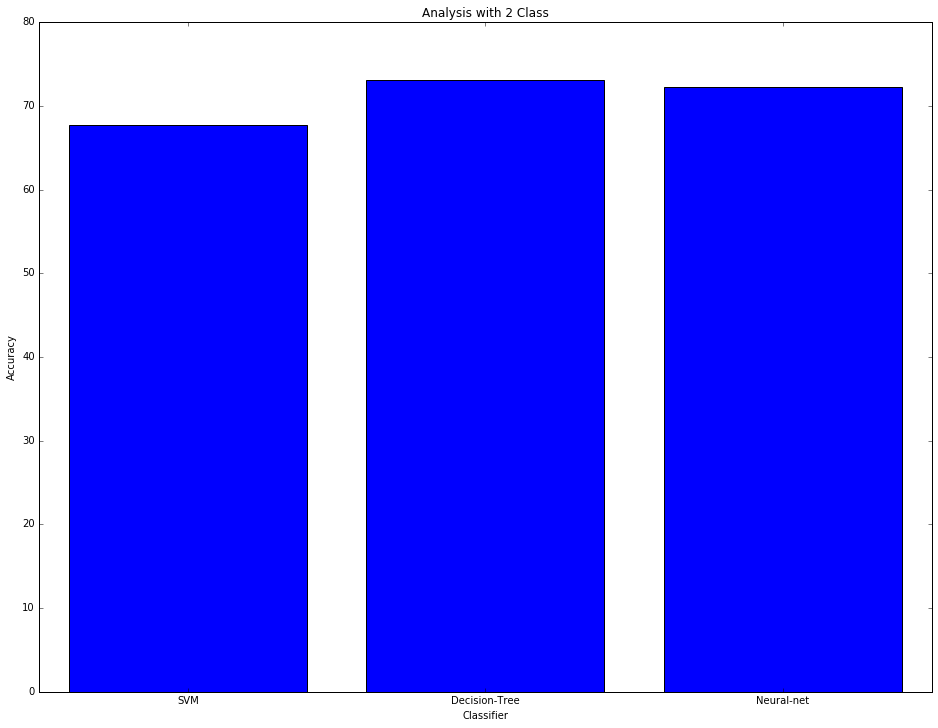

In [342]:
#%pylab inline
classifier = [1,2,3]
accuracy_test_data=[svm["test_set"],decision["test_set"],neural["test_set"]]
LABELS=["SVM","Decision-Tree","Neural-net"]

plt.bar(classifier,accuracy_test_data,align='center')
plt.xticks(classifier, LABELS) #binding label with x axis data
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Analysis with 2 Class')
plt.show()
                    